# Prediksi Harga Saham Tesla Menggunakan Support Vector Regression

## By Kelompok 2 :
## Dava Virgio Kertawijaya - 00000056848 

## Nigel Andrian - 00000055946

## Michael Owen Kohar - 00000056755

## Samuel Andrew - 00000056975

IMPORT

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

Read Dataset

In [2]:
tesla = pd.read_csv('Tesla.csv')
tesla.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [3]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [4]:
#Melakukan Check terhadapa data apakah memiliki nilai null atau tidak
tesla.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [5]:
tesla.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


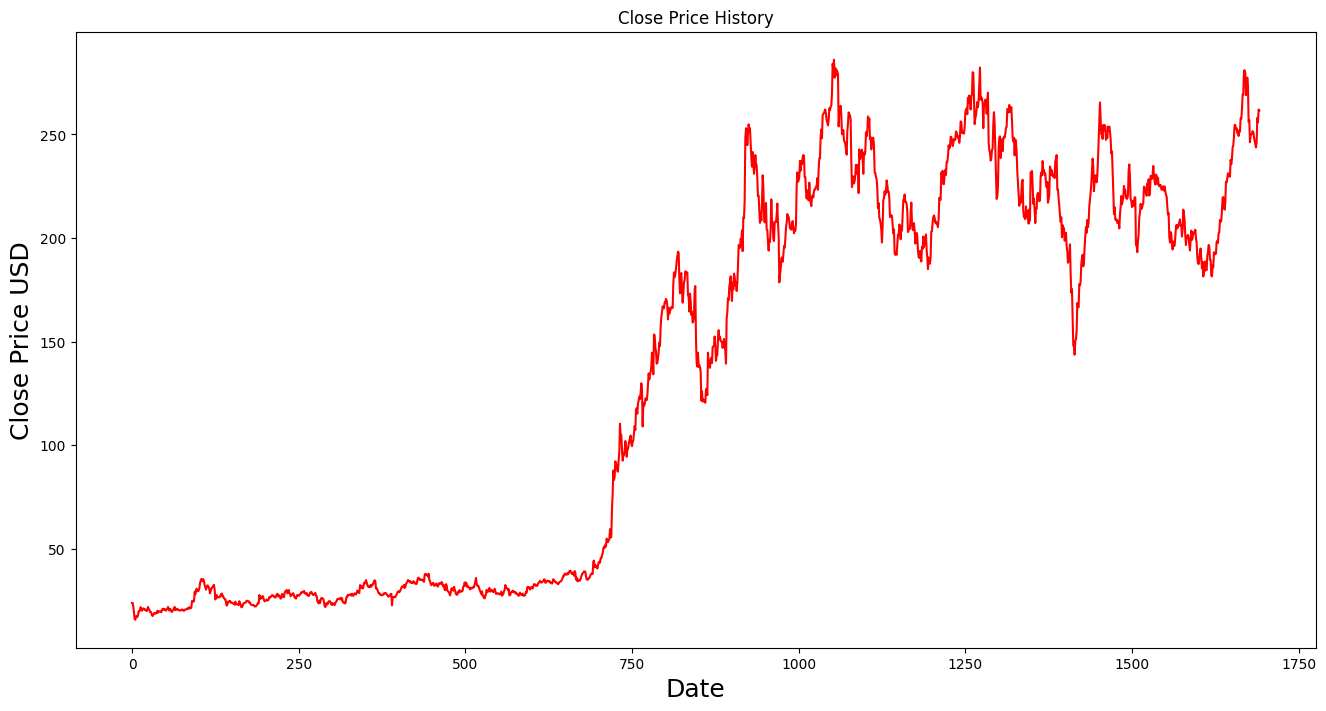

In [6]:
#plotting the data
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(tesla['Close'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.show()

In [7]:
#Menentukan Variable X dan Y
X = tesla[['Open', 'High', 'Low']].values
y = tesla['Close'].values

In [8]:
#pembagian data menjadi set pelatihan (training set) dan set pengujian (testing set) menggunakan fungsi train_test_split dari modul sklearn.model_selection dalam library scikit-learn.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Melakukan Uji Korelasi antar variabel X Dan Y
import numpy as np

correlation_matrix = np.corrcoef(X.T, y)
correlation_with_target = correlation_matrix[-1, :-1]

print(correlation_with_target)

[0.99923326 0.99969092 0.9996561 ]


In [10]:
#Melakukan PreProcessing data menggunakan teknik MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

## RBF

# C = 0.1 , Epsilon = 0.1 , Gamma = 0.1 

In [11]:
svr = SVR(kernel='rbf', C=0.1, gamma=0.1, epsilon=0.1)

In [12]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [13]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-2019.38960196 -2684.90951015    -3.30158869   -62.45166163
   -49.20031584]
R-squared mean: -963.8505356542116
R-squared std: 1153.079871338242


In [14]:
svr.fit(X_train, y_train)

SVR(C=0.1, gamma=0.1)

In [15]:
y_pred = svr.predict(X_test)

In [16]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 9778.692437946775
Root Mean Squared Error: 98.88727136465428
Mean Absolute Error: 89.75919412717663
R-squared: -0.04855369558381595


# C = 0.1 , Epsilon = 0.01 , Gamma = 0.1 

In [17]:
svr = SVR(kernel='rbf', C=0.1, gamma=0.1, epsilon=0.01)

In [18]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [19]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-2020.49249401 -2686.44247439    -3.30454679   -62.47306825
   -49.21883306]
R-squared mean: -964.3862832997313
R-squared std: 1153.7326265024037


In [20]:
svr.fit(X_train, y_train)

SVR(C=0.1, epsilon=0.01, gamma=0.1)

In [21]:
y_pred = svr.predict(X_test)

In [22]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 9785.311386347861
Root Mean Squared Error: 98.92073284376669
Mean Absolute Error: 89.76901713602618
R-squared: -0.04926343493300611


# C = 0.1 , Epsilon = 0.001 , Gamma = 0.1 

In [23]:
svr = SVR(kernel='rbf', C=0.1, gamma=0.1, epsilon=0.001)

In [24]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [25]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-2020.70749192 -2686.74131275    -3.30454679   -62.47459018
   -49.22014957]
R-squared mean: -964.4896182442253
R-squared std: 1153.8607497097312


In [26]:
svr.fit(X_train, y_train)

SVR(C=0.1, epsilon=0.001, gamma=0.1)

In [27]:
y_pred = svr.predict(X_test)

In [28]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 9785.974172187969
Root Mean Squared Error: 98.92408287261485
Mean Absolute Error: 89.76999943691114
R-squared: -0.049334504408443225


# C = 0.1 , Epsilon = 0.0001 , Gamma = 0.1 

In [29]:
svr = SVR(kernel='rbf', C=0.1, gamma=0.1, epsilon=0.0001)

In [30]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [31]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-2020.72899234 -2686.7711975     -3.30454679   -62.47451504
   -49.22008458]
R-squared mean: -964.4998672507885
R-squared std: 1153.8736291596886


In [32]:
svr.fit(X_train, y_train)

SVR(C=0.1, epsilon=0.0001, gamma=0.1)

In [33]:
y_pred = svr.predict(X_test)

In [34]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 9786.040459681979
Root Mean Squared Error: 98.92441791429444
Mean Absolute Error: 89.77009766699963
R-squared: -0.04934161231139211


# C = 0.1 , Epsilon = 0.1 , Gamma = 0.01 

In [35]:
svr = SVR(kernel='rbf', C=0.1, gamma=0.01, epsilon=0.1)

In [36]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [37]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-1.77839806e+03 -2.32726553e+03 -1.74466663e+00 -4.84142674e+01
 -3.68495161e+01]
R-squared mean: -838.5344070015005
R-squared std: 1006.6647507196483


In [38]:
svr.fit(X_train, y_train)

SVR(C=0.1, gamma=0.01)

In [39]:
y_pred = svr.predict(X_test)

In [40]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 7576.57624150215
Root Mean Squared Error: 87.0435307274593
Mean Absolute Error: 79.33478140357875
R-squared: 0.18757573486300294


# C = 0.1 , Epsilon = 0.1 , Gamma = 0.001 

In [41]:
svr = SVR(kernel='rbf', C=0.1, gamma=0.001, epsilon=0.1)

In [42]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [43]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-1.25758953e+03 -1.60899790e+03 -4.11705432e-01 -3.18808385e+01
 -2.21923125e+01]
R-squared mean: -584.2144578488567
R-squared std: 702.1940003715492


In [44]:
svr.fit(X_train, y_train)

SVR(C=0.1, gamma=0.001)

In [45]:
y_pred = svr.predict(X_test)

In [46]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 4835.13255162105
Root Mean Squared Error: 69.5351173984847
Mean Absolute Error: 62.25300227266322
R-squared: 0.48153639785562374


# C = 0.1 , Epsilon = 0.1 , Gamma = 0.0001 

In [47]:
svr = SVR(kernel='rbf', C=0.1, gamma=0.0001, epsilon=0.1)

In [48]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [49]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-8.06830614e+02 -1.01010361e+03  5.08481788e-01 -1.87234389e+01
 -1.11283482e+01]
R-squared mean: -369.2555060137676
R-squared std: 444.97448615727114


In [50]:
svr.fit(X_train, y_train)

SVR(C=0.1, gamma=0.0001)

In [51]:
y_pred = svr.predict(X_test)

In [52]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 2548.3977677130915
Root Mean Squared Error: 50.4816577353903
Mean Absolute Error: 44.61614665642437
R-squared: 0.7267393453562616


# C = 0.1 , Epsilon = 0.01 , Gamma = 0.01 

In [53]:
svr = SVR(kernel='rbf', C=0.1, gamma=0.01, epsilon=0.01)

In [54]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [55]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-1.77824595e+03 -2.32705541e+03 -1.74466663e+00 -4.84316221e+01
 -3.68642979e+01]
R-squared mean: -838.4683889066677
R-squared std: 1006.5691213614599


In [56]:
svr.fit(X_train, y_train)

SVR(C=0.1, epsilon=0.01, gamma=0.01)

In [57]:
y_pred = svr.predict(X_test)

In [58]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 7578.462023220843
Root Mean Squared Error: 87.05436245944739
Mean Absolute Error: 79.33743977652306
R-squared: 0.18737352547736708


# C = 0.1 , Epsilon = 0.01 , Gamma = 0.001 

In [59]:
svr = SVR(kernel='rbf', C=0.1, gamma=0.001, epsilon=0.01)

In [60]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [61]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-1.25689351e+03 -1.60804812e+03 -4.11705432e-01 -3.18786175e+01
 -2.21904888e+01]
R-squared mean: -583.8844877810259
R-squared std: 701.7839272701302


In [62]:
svr.fit(X_train, y_train)

SVR(C=0.1, epsilon=0.01, gamma=0.001)

In [63]:
y_pred = svr.predict(X_test)

In [64]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 4831.369105627526
Root Mean Squared Error: 69.50805065334177
Mean Absolute Error: 62.24669590664343
R-squared: 0.48193994620625247


# C = 0.1 , Epsilon = 0.01 , Gamma = 0.0001 

In [65]:
svr = SVR(kernel='rbf', C=0.1, gamma=0.0001, epsilon=0.01)

In [66]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [67]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-8.07065229e+02 -1.01029381e+03  5.08481788e-01 -1.87435657e+01
 -1.11445000e+01]
R-squared mean: -369.34772460692795
R-squared std: 445.06964353515224


In [68]:
svr.fit(X_train, y_train)

SVR(C=0.1, epsilon=0.01, gamma=0.0001)

In [69]:
y_pred = svr.predict(X_test)

In [70]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 2549.420564015889
Root Mean Squared Error: 50.49178709469381
Mean Absolute Error: 44.61553151439951
R-squared: 0.7266296725293543


# C = 0.1 , Epsilon = 0.001 , Gamma = 0.01 

In [71]:
svr = SVR(kernel='rbf', C=0.1, gamma=0.01, epsilon=0.001)

In [72]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [73]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-1.77844727e+03 -2.32733351e+03 -1.74466663e+00 -4.84298775e+01
 -3.68628119e+01]
R-squared mean: -838.5636266878976
R-squared std: 1006.6894787517568


In [74]:
svr.fit(X_train, y_train)

SVR(C=0.1, epsilon=0.001, gamma=0.01)

In [75]:
y_pred = svr.predict(X_test)

In [76]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 7579.00104709407
Root Mean Squared Error: 87.05745830825794
Mean Absolute Error: 79.3382666407961
R-squared: 0.1873157268015352


# C = 0.1 , Epsilon = 0.001 , Gamma = 0.001 

In [77]:
svr = SVR(kernel='rbf', C=0.1, gamma=0.001, epsilon=0.001)

In [78]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [79]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-1.25689351e+03 -1.60804812e+03 -4.11705432e-01 -3.18772736e+01
 -2.21893853e+01]
R-squared mean: -583.8839982863731
R-squared std: 701.7843153415885


In [80]:
svr.fit(X_train, y_train)

SVR(C=0.1, epsilon=0.001, gamma=0.001)

In [81]:
y_pred = svr.predict(X_test)

In [82]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 4831.369105627526
Root Mean Squared Error: 69.50805065334177
Mean Absolute Error: 62.24669590664343
R-squared: 0.48193994620625247


# C = 0.1 , Epsilon = 0.001 , Gamma = 0.0001 

In [83]:
svr = SVR(kernel='rbf', C=0.1, gamma=0.0001, epsilon=0.001)

In [84]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [85]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-8.07000839e+02 -1.01011058e+03  5.08481788e-01 -1.87439764e+01
 -1.11445000e+01]
R-squared mean: -369.29828193619113
R-squared std: 445.0041393084436


In [86]:
svr.fit(X_train, y_train)

SVR(C=0.1, epsilon=0.001, gamma=0.0001)

In [87]:
y_pred = svr.predict(X_test)

In [88]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 2549.4205640158875
Root Mean Squared Error: 50.4917870946938
Mean Absolute Error: 44.6155315143995
R-squared: 0.7266296725293544


# C = 0.1 , Epsilon = 0.0001 , Gamma = 0.01 

In [89]:
svr = SVR(kernel='rbf', C=0.1, gamma=0.01, epsilon=0.0001)

In [90]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [91]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-1.77846740e+03 -2.32736132e+03 -1.74466749e+00 -4.84298775e+01
 -3.68628119e+01]
R-squared mean: -838.5732155576504
R-squared std: 1006.7014636833238


In [92]:
svr.fit(X_train, y_train)

SVR(C=0.1, epsilon=0.0001, gamma=0.01)

In [93]:
y_pred = svr.predict(X_test)

In [94]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 7579.054950984987
Root Mean Squared Error: 87.0577678957196
Mean Absolute Error: 79.33834894168106
R-squared: 0.18730994677272395


# C = 0.1 , Epsilon = 0.0001 , Gamma = 0.001 

In [95]:
svr = SVR(kernel='rbf', C=0.1, gamma=0.001, epsilon=0.0001)

In [96]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [97]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-1.25689351e+03 -1.60804812e+03 -4.11705432e-01 -3.18772736e+01
 -2.21893853e+01]
R-squared mean: -583.8839982863727
R-squared std: 701.7843153415881


In [98]:
svr.fit(X_train, y_train)

SVR(C=0.1, epsilon=0.0001, gamma=0.001)

In [99]:
y_pred = svr.predict(X_test)

In [100]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 4831.369105627526
Root Mean Squared Error: 69.50805065334177
Mean Absolute Error: 62.24669590664343
R-squared: 0.48193994620625247


# C = 0.1 , Epsilon = 0.0001 , Gamma = 0.0001 

In [101]:
svr = SVR(kernel='rbf', C=0.1, gamma=0.0001, epsilon=0.0001)

In [102]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [103]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-8.07000839e+02 -1.01009225e+03  5.08481788e-01 -1.87439764e+01
 -1.11445000e+01]
R-squared mean: -369.2946174458489
R-squared std: 444.9988624192593


In [104]:
svr.fit(X_train, y_train)

SVR(C=0.1, epsilon=0.0001, gamma=0.0001)

In [105]:
y_pred = svr.predict(X_test)

In [106]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 2549.420564015889
Root Mean Squared Error: 50.49178709469381
Mean Absolute Error: 44.61553151439951
R-squared: 0.7266296725293542


# C = 1 , Epsilon = 0.1 , Gamma = 0.1 

In [107]:
svr = SVR(kernel='rbf', C=1, gamma=0.1, epsilon=0.1)

In [108]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [109]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-1.41733308e+03 -1.71915004e+03 -2.73084636e-02 -2.16727341e+01
 -1.44619579e+01]
R-squared mean: -634.5290223389621
R-squared std: 768.3558222571648


In [110]:
svr.fit(X_train, y_train)

SVR(C=1, gamma=0.1)

In [111]:
y_pred = svr.predict(X_test)

In [112]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 3115.928738412167
Root Mean Squared Error: 55.82050464132483
Mean Absolute Error: 46.65183009000264
R-squared: 0.6658838986325751


# C = 1 , Epsilon = 0.01 , Gamma = 0.1 

In [113]:
svr = SVR(kernel='rbf', C=1, gamma=0.1, epsilon=0.01)

In [114]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [115]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-1.41811134e+03 -1.72020837e+03 -2.76727668e-02 -2.16767049e+01
 -1.44651427e+01]
R-squared mean: -634.8978462234617
R-squared std: 768.8119873003299


In [116]:
svr.fit(X_train, y_train)

SVR(C=1, epsilon=0.01, gamma=0.1)

In [117]:
y_pred = svr.predict(X_test)

In [118]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 3115.866782113317
Root Mean Squared Error: 55.81994967852727
Mean Absolute Error: 46.64615551051413
R-squared: 0.6658905421083299


# C = 1 , Epsilon = 0.001 , Gamma = 0.1 

In [119]:
svr = SVR(kernel='rbf', C=1, gamma=0.1, epsilon=0.001)

In [120]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [121]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-1.41816993e+03 -1.72028806e+03 -2.76655942e-02 -2.16760102e+01
 -1.44645855e+01]
R-squared mean: -634.9252503944748
R-squared std: 768.8466254775408


In [122]:
svr.fit(X_train, y_train)

SVR(C=1, epsilon=0.001, gamma=0.1)

In [123]:
y_pred = svr.predict(X_test)

In [124]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 3115.8998650388207
Root Mean Squared Error: 55.82024601377909
Mean Absolute Error: 46.647433054246534
R-squared: 0.6658869946786486


# C = 1 , Epsilon = 0.0001 , Gamma = 0.1 

In [125]:
svr = SVR(kernel='rbf', C=1, gamma=0.1, epsilon=0.0001)

In [126]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [127]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-1.41817699e+03 -1.72029766e+03 -2.76649113e-02 -2.16759750e+01
 -1.44645572e+01]
R-squared mean: -634.9285709196472
R-squared std: 768.8507863454987


In [128]:
svr.fit(X_train, y_train)

SVR(C=1, epsilon=0.0001, gamma=0.1)

In [129]:
y_pred = svr.predict(X_test)

In [130]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 3115.903160822177
Root Mean Squared Error: 55.82027553516891
Mean Absolute Error: 46.647562404384026
R-squared: 0.6658866412770215


# C = 1 , Epsilon = 0.1 , Gamma = 0.01 

In [131]:
svr = SVR(kernel='rbf', C=1, gamma=0.01, epsilon=0.1)

In [132]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [133]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-5.87905151e+02 -3.46730887e+02  1.54369791e-01 -5.16348684e+00
 -2.25047693e-01]
R-squared mean: -187.97404061348686
R-squared std: 240.50376758602658


In [134]:
svr.fit(X_train, y_train)

SVR(C=1, gamma=0.01)

In [135]:
y_pred = svr.predict(X_test)

In [136]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 741.1941038872787
Root Mean Squared Error: 27.224880236417548
Mean Absolute Error: 13.982137785079981
R-squared: 0.920522930677312


# C = 1 , Epsilon = 0.1 , Gamma = 0.001 

In [137]:
svr = SVR(kernel='rbf', C=1, gamma=0.001, epsilon=0.1)

In [138]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [139]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-49.89318586  -8.32141376   0.66116131  -1.78139135   0.77185111]
R-squared mean: -11.71259571217712
R-squared std: 19.374507347142913


In [140]:
svr.fit(X_train, y_train)

SVR(C=1, gamma=0.001)

In [141]:
y_pred = svr.predict(X_test)

In [142]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 182.76205399167696
Root Mean Squared Error: 13.518951660231535
Mean Absolute Error: 5.723994619769737
R-squared: 0.9804027145406672


# C = 1 , Epsilon = 0.1 , Gamma = 0.0001 

In [143]:
svr = SVR(kernel='rbf', C=1, gamma=0.0001, epsilon=0.1)

In [144]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [145]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-4.05330594  0.70054172  0.93959371  0.09328926  0.92864236]
R-squared mean: -0.27824777539987283
R-squared std: 1.9124253980903627


In [146]:
svr.fit(X_train, y_train)

SVR(C=1, gamma=0.0001)

In [147]:
y_pred = svr.predict(X_test)

In [148]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 38.83615023859141
Root Mean Squared Error: 6.231865710891997
Mean Absolute Error: 3.1107459272957545
R-squared: 0.9958356611465864


# C = 1 , Epsilon = 0.01 , Gamma = 0.01 

In [149]:
svr = SVR(kernel='rbf', C=1, gamma=0.01, epsilon=0.01)

In [150]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [151]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-5.87901944e+02 -3.46439910e+02  1.53713609e-01 -5.16461121e+00
 -2.24893379e-01]
R-squared mean: -187.91552888608052
R-squared std: 240.46406129242695


In [152]:
svr.fit(X_train, y_train)

SVR(C=1, epsilon=0.01, gamma=0.01)

In [153]:
y_pred = svr.predict(X_test)

In [154]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 741.4947150211656
Root Mean Squared Error: 27.230400566667498
Mean Absolute Error: 13.985534221284254
R-squared: 0.9204906966217498


# C = 1 , Epsilon = 0.01 , Gamma = 0.001 

In [155]:
svr = SVR(kernel='rbf', C=1, gamma=0.001, epsilon=0.01)

In [156]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [157]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-49.56682404  -8.23790372   0.66087281  -1.78264359   0.77162529]
R-squared mean: -11.630974651614945
R-squared std: 19.248611500647957


In [158]:
svr.fit(X_train, y_train)

SVR(C=1, epsilon=0.01, gamma=0.001)

In [159]:
y_pred = svr.predict(X_test)

In [160]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 182.82516642013775
Root Mean Squared Error: 13.521285679259119
Mean Absolute Error: 5.727556473525405
R-squared: 0.9803959470949662


# C = 1 , Epsilon = 0.01 , Gamma = 0.0001 

In [161]:
svr = SVR(kernel='rbf', C=1, gamma=0.0001, epsilon=0.01)

In [162]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [163]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-4.02765314  0.70032896  0.93921423  0.09026825  0.92837553]
R-squared mean: -0.2738932322759272
R-squared std: 1.902078642232936


In [164]:
svr.fit(X_train, y_train)

SVR(C=1, epsilon=0.01, gamma=0.0001)

In [165]:
y_pred = svr.predict(X_test)

In [166]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 38.82746626320429
Root Mean Squared Error: 6.231168932327569
Mean Absolute Error: 3.1085548511122325
R-squared: 0.9958365923155073


# C = 1 , Epsilon = 0.001 , Gamma = 0.01 

In [167]:
svr = SVR(kernel='rbf', C=1, gamma=0.01, epsilon=0.001)

In [168]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [169]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-5.87831399e+02 -3.46315047e+02  1.53672156e-01 -5.16499701e+00
 -2.24752948e-01]
R-squared mean: -187.87650473334833
R-squared std: 240.4240885065563


In [170]:
svr.fit(X_train, y_train)

SVR(C=1, epsilon=0.001, gamma=0.01)

In [171]:
y_pred = svr.predict(X_test)

# C = 1 , Epsilon = 0.001 , Gamma = 0.01 

In [172]:
svr = SVR(kernel='rbf', C=1, gamma=0.01, epsilon=0.001)

In [173]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [174]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-5.87831399e+02 -3.46315047e+02  1.53672156e-01 -5.16499701e+00
 -2.24752948e-01]
R-squared mean: -187.87650473334833
R-squared std: 240.4240885065563


In [175]:
svr.fit(X_train, y_train)

SVR(C=1, epsilon=0.001, gamma=0.01)

In [176]:
y_pred = svr.predict(X_test)

In [177]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 741.4545832722796
Root Mean Squared Error: 27.229663664325336
Mean Absolute Error: 13.985415832557267
R-squared: 0.9204949998855932


In [178]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 741.4545832722796
Root Mean Squared Error: 27.229663664325336
Mean Absolute Error: 13.985415832557267
R-squared: 0.9204949998855932


# C = 1 , Epsilon = 0.001 , Gamma = 0.001 

In [179]:
svr = SVR(kernel='rbf', C=1, gamma=0.001, epsilon=0.001)

In [180]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [181]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-49.56715056  -8.25617835   0.66094925  -1.78233726   0.77155577]
R-squared mean: -11.634632229647334
R-squared std: 19.248129457175207


In [182]:
svr.fit(X_train, y_train)

SVR(C=1, epsilon=0.001, gamma=0.001)

In [183]:
y_pred = svr.predict(X_test)

In [184]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 182.79947123645465
Root Mean Squared Error: 13.520335470558955
Mean Absolute Error: 5.727464023723256
R-squared: 0.9803987023487981


# C = 1 , Epsilon = 0.001 , Gamma = 0.0001 

In [185]:
svr = SVR(kernel='rbf', C=1, gamma=0.0001, epsilon=0.001)

In [186]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [187]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-4.03600803  0.70024465  0.93913663  0.09072434  0.92832333]
R-squared mean: -0.27551581601006764
R-squared std: 1.9053687960508894


In [188]:
svr.fit(X_train, y_train)

SVR(C=1, epsilon=0.001, gamma=0.0001)

In [189]:
y_pred = svr.predict(X_test)

In [190]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 38.90382732650471
Root Mean Squared Error: 6.237293269239848
Mean Absolute Error: 3.109878984468498
R-squared: 0.9958284042396852


# C = 1 , Epsilon = 0.0001 , Gamma = 0.01 

In [191]:
svr = SVR(kernel='rbf', C=1, gamma=0.01, epsilon=0.0001)

In [192]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [193]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-5.87825678e+02 -3.46302438e+02  1.53670161e-01 -5.16508113e+00
 -2.24748602e-01]
R-squared mean: -187.87285517434216
R-squared std: 240.42051083438238


In [194]:
svr.fit(X_train, y_train)

SVR(C=1, epsilon=0.0001, gamma=0.01)

In [195]:
y_pred = svr.predict(X_test)

In [196]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 741.4407753078965
Root Mean Squared Error: 27.229410116781754
Mean Absolute Error: 13.985395039852294
R-squared: 0.920496480491735


# C = 1 , Epsilon = 0.0001 , Gamma = 0.001 

In [197]:
svr = SVR(kernel='rbf', C=1, gamma=0.001, epsilon=0.0001)

In [198]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [199]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-49.55786204  -8.25151954   0.66094538  -1.78222591   0.77154004]
R-squared mean: -11.63182441353666
R-squared std: 19.244640920625887


In [200]:
svr.fit(X_train, y_train)

SVR(C=1, epsilon=0.0001, gamma=0.001)

In [201]:
y_pred = svr.predict(X_test)

In [202]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 182.79846095733873
Root Mean Squared Error: 13.52029810904104
Mean Absolute Error: 5.727515103465411
R-squared: 0.9803988106794269


# C = 1 , Epsilon = 0.0001 , Gamma = 0.0001 

In [203]:
svr = SVR(kernel='rbf', C=1, gamma=0.0001, epsilon=0.0001)

In [204]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [205]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-4.03744063  0.70017422  0.93912643  0.09070414  0.92831405]
R-squared mean: -0.27582435804590333
R-squared std: 1.905923822971147


In [206]:
svr.fit(X_train, y_train)

SVR(C=1, epsilon=0.0001, gamma=0.0001)

In [207]:
y_pred = svr.predict(X_test)

In [208]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 38.90759830455955
Root Mean Squared Error: 6.237595554743795
Mean Absolute Error: 3.1100533373413217
R-squared: 0.9958279998836835


# C = 10 , Epsilon = 0.1 , Gamma = 0.1 

In [209]:
svr = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=0.1)

In [210]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [211]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-1.05031499e+03 -1.34444692e+02 -4.29959723e-01 -2.86932334e+00
  4.19898943e-01]
R-squared mean: -237.52781310430424
R-squared std: 409.6701690006602


In [212]:
svr.fit(X_train, y_train)

SVR(C=10, gamma=0.1)

In [213]:
y_pred = svr.predict(X_test)

In [214]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 593.5526798803174
Root Mean Squared Error: 24.36293660214871
Mean Absolute Error: 10.931244296627888
R-squared: 0.9363542866327368


# C = 10 , Epsilon = 0.01 , Gamma = 0.1 

In [215]:
svr = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=0.01)

In [216]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [217]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-1.05060559e+03 -1.34502140e+02 -4.30287369e-01 -2.86937251e+00
  4.19859900e-01]
R-squared mean: -237.59750668975545
R-squared std: 409.78254163583324


In [218]:
svr.fit(X_train, y_train)

SVR(C=10, epsilon=0.01, gamma=0.1)

In [219]:
y_pred = svr.predict(X_test)

In [220]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 593.5711205734611
Root Mean Squared Error: 24.36331505713993
Mean Absolute Error: 10.933293100053778
R-squared: 0.9363523092664306


# C = 10 , Epsilon = 0.001 , Gamma = 0.1 

In [221]:
svr = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=0.001)

In [222]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [223]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-1.05064036e+03 -1.34512996e+02 -4.30352137e-01 -2.86935969e+00
  4.19867295e-01]
R-squared mean: -237.6066407420929
R-squared std: 409.79578699352174


In [224]:
svr.fit(X_train, y_train)

SVR(C=10, epsilon=0.001, gamma=0.1)

In [225]:
y_pred = svr.predict(X_test)

In [226]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 593.5817068018748
Root Mean Squared Error: 24.363532313724026
Mean Absolute Error: 10.933022304760422
R-squared: 0.9363511741219319


# C = 10 , Epsilon = 0.0001 , Gamma = 0.1 

In [227]:
svr = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=0.0001)

In [228]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [229]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-1.05064442e+03 -1.34513291e+02 -4.30354369e-01 -2.86936827e+00
  4.19867335e-01]
R-squared mean: -237.60751243927356
R-squared std: 409.79737880763804


In [230]:
svr.fit(X_train, y_train)

SVR(C=10, epsilon=0.0001, gamma=0.1)

In [231]:
y_pred = svr.predict(X_test)

In [232]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 593.5841952362899
Root Mean Squared Error: 24.363583382505333
Mean Absolute Error: 10.933080400771745
R-squared: 0.9363509072910526


# C = 10 , Epsilon = 0.1 , Gamma = 0.01 

In [233]:
svr = SVR(kernel='rbf', C=10, gamma=0.01, epsilon=0.1)

In [234]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [235]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-2.61040766e+02  8.67409039e-01  1.53948446e-01 -1.09361699e-01
  9.41529900e-01]
R-squared mean: -51.83744811975613
R-squared std: 104.60243884523832


In [236]:
svr.fit(X_train, y_train)

SVR(C=10, gamma=0.01)

In [237]:
y_pred = svr.predict(X_test)

In [238]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 38.68663553997865
Root Mean Squared Error: 6.219858160760473
Mean Absolute Error: 2.600888830648178
R-squared: 0.9958516933708096


# C = 10 , Epsilon = 0.1 , Gamma = 0.001 

In [239]:
svr = SVR(kernel='rbf', C=10, gamma=0.001, epsilon=0.1)

In [240]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [241]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-5.4196484   0.98078866  0.72022279  0.83709419  0.99152955]
R-squared mean: -0.37800264310943704
R-squared std: 2.522803346338801


In [242]:
svr.fit(X_train, y_train)

SVR(C=10, gamma=0.001)

In [243]:
y_pred = svr.predict(X_test)

In [244]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 3.44360923652481
Root Mean Squared Error: 1.8556964289788376
Mean Absolute Error: 1.1049455163286541
R-squared: 0.9996307472380364


# C = 10 , Epsilon = 0.1 , Gamma = 0.0001 

In [245]:
svr = SVR(kernel='rbf', C=10, gamma=0.01, epsilon=0.1)

In [246]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [247]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-2.61040766e+02  8.67409039e-01  1.53948446e-01 -1.09361699e-01
  9.41529900e-01]
R-squared mean: -51.83744811975613
R-squared std: 104.60243884523832


In [248]:
svr.fit(X_train, y_train)

SVR(C=10, gamma=0.01)

In [249]:
y_pred = svr.predict(X_test)

In [250]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 38.68663553997865
Root Mean Squared Error: 6.219858160760473
Mean Absolute Error: 2.600888830648178
R-squared: 0.9958516933708096


# C = 10 , Epsilon = 0.01 , Gamma = 0.01 

In [251]:
svr = SVR(kernel='rbf', C=10, gamma=0.01, epsilon=0.01)

In [252]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [253]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-2.58859001e+02  8.67131761e-01  1.54504214e-01 -1.11686868e-01
  9.41400949e-01]
R-squared mean: -51.40153010013919
R-squared std: 103.7295234589222


In [254]:
svr.fit(X_train, y_train)

SVR(C=10, epsilon=0.01, gamma=0.01)

In [255]:
y_pred = svr.predict(X_test)

In [256]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 38.56972078868568
Root Mean Squared Error: 6.210452542986355
Mean Absolute Error: 2.5978530401191806
R-squared: 0.9958642299543369


# C = 10 , Epsilon = 0.01 , Gamma = 0.001 

In [257]:
svr = SVR(kernel='rbf', C=10, gamma=0.001, epsilon=0.01)

In [258]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [259]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-5.3142368   0.98124224  0.72055152  0.83811179  0.99150755]
R-squared mean: -0.3565647424823163
R-squared std: 2.480845425177572


In [260]:
svr.fit(X_train, y_train)

SVR(C=10, epsilon=0.01, gamma=0.001)

In [261]:
y_pred = svr.predict(X_test)

In [262]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 3.431406507378138
Root Mean Squared Error: 1.8524056001259923
Mean Absolute Error: 1.1030264339302216
R-squared: 0.9996320557173473


# C = 10 , Epsilon = 0.01 , Gamma = 0.0001 

In [263]:
svr = SVR(kernel='rbf', C=10, gamma=0.0001, epsilon=0.01)

In [264]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [265]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [0.55393612 0.96222393 0.99152583 0.94088271 0.99063584]
R-squared mean: 0.8878408890550741
R-squared std: 0.16802144990605025


In [266]:
svr.fit(X_train, y_train)

SVR(C=10, epsilon=0.01, gamma=0.0001)

In [267]:
y_pred = svr.predict(X_test)

In [268]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 4.514465332460753
Root Mean Squared Error: 2.124727119528706
Mean Absolute Error: 1.3212154822135076
R-squared: 0.9995159210356624


# C = 10 , Epsilon = 0.001 , Gamma = 0.01 

In [269]:
svr = SVR(kernel='rbf', C=10, gamma=0.01, epsilon=0.001)

In [270]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [271]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-2.58931194e+02  8.67403505e-01  1.54287836e-01 -1.12007780e-01
  9.41414579e-01]
R-squared mean: -51.4160191837561
R-squared std: 103.75837615735776


In [272]:
svr.fit(X_train, y_train)

SVR(C=10, epsilon=0.001, gamma=0.01)

In [273]:
y_pred = svr.predict(X_test)

In [274]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 38.58944369927392
Root Mean Squared Error: 6.212040220352241
Mean Absolute Error: 2.598992798053232
R-squared: 0.9958621150978859


# C = 10 , Epsilon = 0.001 , Gamma = 0.001 

In [275]:
svr = SVR(kernel='rbf', C=10, gamma=0.001, epsilon=0.001)

In [276]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [277]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-5.37618925  0.98107087  0.72060018  0.83817171  0.99150593]
R-squared mean: -0.36896811015586917
R-squared std: 2.5055978962028393


In [278]:
svr.fit(X_train, y_train)

SVR(C=10, epsilon=0.001, gamma=0.001)

In [279]:
y_pred = svr.predict(X_test)

In [280]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 3.4288990348301756
Root Mean Squared Error: 1.8517286612325725
Mean Absolute Error: 1.103194643733742
R-squared: 0.9996323245896555


# C = 10 , Epsilon = 0.001 , Gamma = 0.0001 

In [281]:
svr = SVR(kernel='rbf', C=10, gamma=0.0001, epsilon=0.001)

In [282]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [283]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [0.55858489 0.96282835 0.99149878 0.94073362 0.99064381]
R-squared mean: 0.888857891124253
R-squared std: 0.16621582413407984


In [284]:
svr.fit(X_train, y_train)

SVR(C=10, epsilon=0.001, gamma=0.0001)

In [285]:
y_pred = svr.predict(X_test)

In [286]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 4.543810374860177
Root Mean Squared Error: 2.1316215364975504
Mean Absolute Error: 1.324803154624826
R-squared: 0.9995127744132638


# C = 10 , Epsilon = 0.0001 , Gamma = 0.01 

In [287]:
svr = SVR(kernel='rbf', C=10, gamma=0.01, epsilon=0.0001)

In [288]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [289]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-2.58920447e+02  8.67422665e-01  1.54297664e-01 -1.12060191e-01
  9.41416067e-01]
R-squared mean: -51.41387416435939
R-squared std: 103.7540752521381


In [290]:
svr.fit(X_train, y_train)

SVR(C=10, epsilon=0.0001, gamma=0.01)

In [291]:
y_pred = svr.predict(X_test)

In [292]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 38.591440593303844
Root Mean Squared Error: 6.212200945985557
Mean Absolute Error: 2.599068906516067
R-squared: 0.9958619009741032


In [293]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hasil dengan Error Terkecil
# C = 10 , Epsilon = 0.001 , Gamma = 0.001 

In [294]:
svr = SVR(kernel='rbf', C=10, gamma=0.001, epsilon=0.001)

In [295]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

In [296]:
# Menampilkan hasil validasi silang
print('R-squared scores:', scores)
print('R-squared mean:', scores.mean())
print('R-squared std:', scores.std())

R-squared scores: [-5.37618925  0.98107087  0.72060018  0.83817171  0.99150593]
R-squared mean: -0.36896811015586917
R-squared std: 2.5055978962028393


In [297]:
svr.fit(X_train, y_train)

SVR(C=10, epsilon=0.001, gamma=0.001)

In [298]:
y_pred = svr.predict(X_test)

In [299]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 3.4288990348301756
Root Mean Squared Error: 1.8517286612325725
Mean Absolute Error: 1.103194643733742
R-squared: 0.9996323245896555


In [300]:
# Melakukan prediksi pada data latih dan data uji
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

# Menghitung koefisien determinasi (R-squared) untuk data latih dan data uji
r_squared_train = r2_score(y_train, y_train_pred)
r_squared_test = r2_score(y_test, y_test_pred)

print("Koefisien Determinasi (R-squared) untuk Data Latih:", r_squared_train)
print("Koefisien Determinasi (R-squared) untuk Data Uji:", r_squared_test)

Koefisien Determinasi (R-squared) untuk Data Latih: 0.999436928173908
Koefisien Determinasi (R-squared) untuk Data Uji: 0.9996323245896555


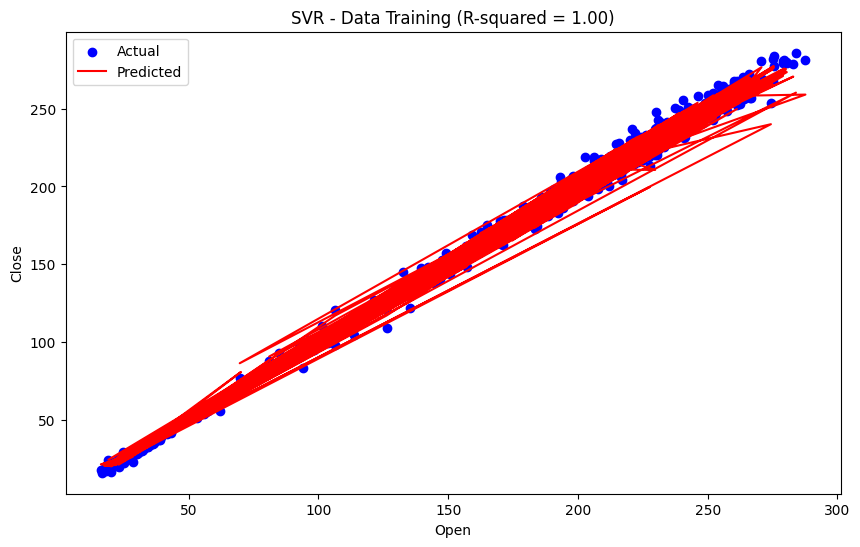

In [301]:
# Visualisasi data training
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], y_train, color='blue', label='Actual')
plt.plot(X_train[:, 0], y_train_pred, color='red', label='Predicted')
plt.title('SVR - Data Training (R-squared = {:.2f})'.format(r_squared_train))
plt.xlabel('Open')
plt.ylabel('Close')
plt.legend()
plt.show()

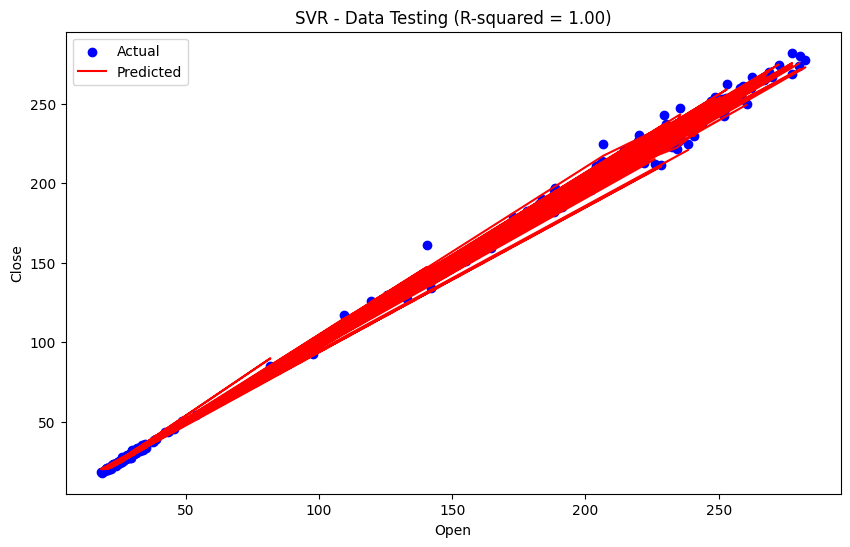

In [302]:
# Visualisasi data testing
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual')
plt.plot(X_test[:, 0], y_test_pred, color='red', label='Predicted')
plt.title('SVR - Data Testing (R-squared = {:.2f})'.format(r_squared_test))
plt.xlabel('Open')
plt.ylabel('Close')
plt.legend()
plt.show()

In [303]:
tesla['Date'] = pd.to_datetime(tesla['Date'])

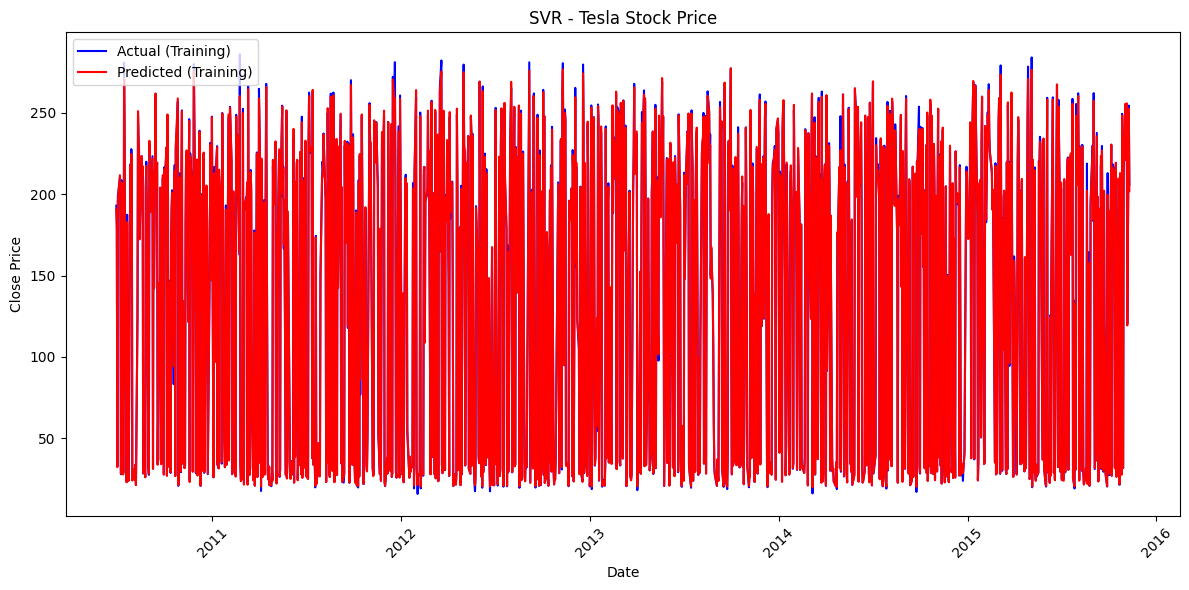

In [304]:
# Visualisasi tren perubahan harga saham
plt.figure(figsize=(12, 6))

# Plot data training
plt.plot(tesla['Date'].iloc[:len(X_train)], y_train, color='blue', label='Actual (Training)')
plt.plot(tesla['Date'].iloc[:len(X_train)], y_train_pred, color='red', label='Predicted (Training)')

plt.title('SVR - Tesla Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

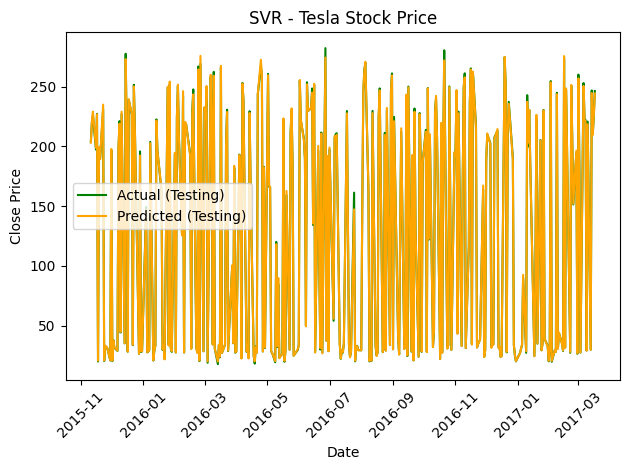

In [305]:
# Plot data testing
plt.plot(tesla['Date'].iloc[-len(X_test):], y_test, color='green', label='Actual (Testing)')
plt.plot(tesla['Date'].iloc[-len(X_test):], y_test_pred, color='orange', label='Predicted (Testing)')

plt.title('SVR - Tesla Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

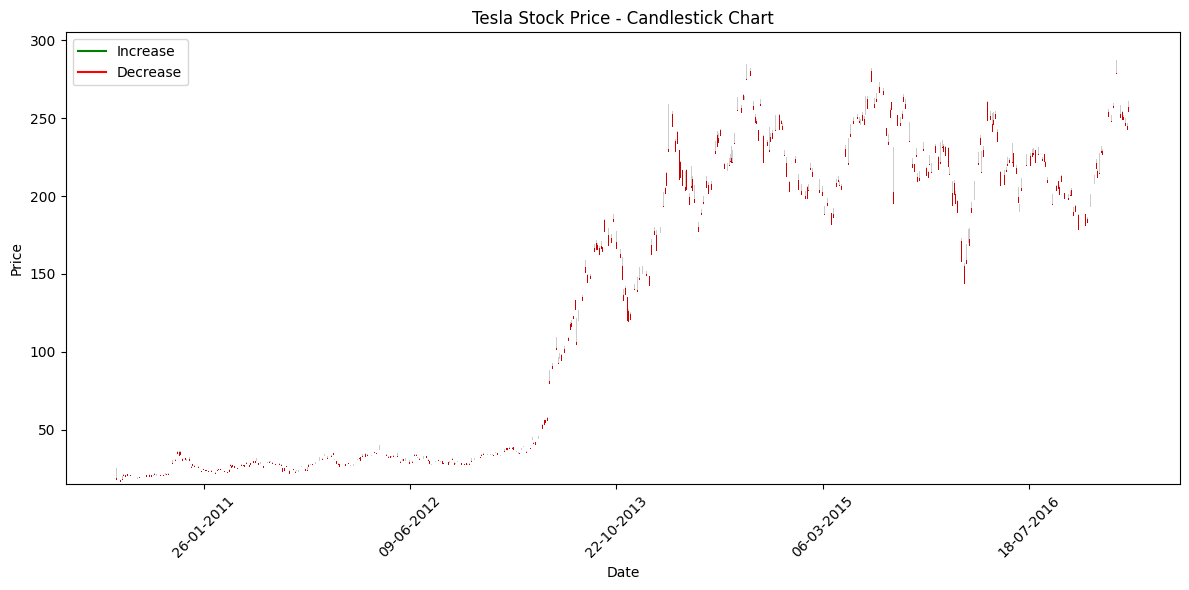

In [306]:
import matplotlib.dates as mpl_dates
# Menggabungkan kolom 'Date' dengan fitur lainnya
ohlc = tesla[['Date', 'Open', 'High', 'Low', 'Close']].values

# Membuat grafik saham dengan candlestick chart
fig, ax = plt.subplots(figsize=(12, 6))
candlestick_data = np.column_stack((mpl_dates.date2num(ohlc[:, 0]), ohlc[:, 1:]))
ax.plot([], [], color='green', label='Increase')
ax.plot([], [], color='red', label='Decrease')
ax.legend()

candlestick_width = 0.6
ax.bar(ohlc[:, 0], ohlc[:, 3] - ohlc[:, 1], width=candlestick_width, bottom=ohlc[:, 1], color=np.where(ohlc[:, 3] - ohlc[:, 1] >= 0, 'green', 'red'))
ax.bar(ohlc[:, 0], ohlc[:, 2] - ohlc[:, 3], width=candlestick_width, bottom=ohlc[:, 3], color='black', alpha=0.2)

ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.xaxis.set_major_formatter(mpl_dates.DateFormatter('%d-%m-%Y'))
plt.xticks(rotation=45)

plt.title('Tesla Stock Price - Candlestick Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

## Linear

In [307]:
svr = SVR(kernel='linear', C=0.1, gamma=0.1)

In [308]:
svr.fit(X_train, y_train)

SVR(C=0.1, gamma=0.1, kernel='linear')

In [309]:
y_pred = svr.predict(X_test)

In [310]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 1.8688319110334317
Root Mean Squared Error: 1.3670522707758588
Mean Absolute Error: 0.9056468396128907
R-squared: 0.999799608115382


## Polynomial

In [311]:
svr = SVR(kernel='poly', C=0.1, gamma=0.1)

In [312]:
svr.fit(X_train, y_train)

SVR(C=0.1, gamma=0.1, kernel='poly')

In [313]:
y_pred = svr.predict(X_test)

In [314]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 413728616.07087857
Root Mean Squared Error: 20340.3199598944
R-squared: -44362.46393986655


## Sigmoid

In [315]:
svr = SVR(kernel='sigmoid', C=0.1, gamma=0.1)

In [316]:
svr.fit(X_train, y_train)

SVR(C=0.1, gamma=0.1, kernel='sigmoid')

In [317]:
y_pred = svr.predict(X_test)

In [318]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 10992.334070999796
Root Mean Squared Error: 104.8443325649975
R-squared: -0.1786905648562198


## Kesimpulan
Setelah melakukan analisis, dapat disimpulkan bahwa model SVR terbaik menggunakan fungsi kernel RBF dengan parameter C = 10, gamma = 0,001, dan epsilon = 0,001. Model ini memiliki tingkat akurasi yang cukup tinggi, yaitu 99,94% untuk data training dan 99,96% untuk data testing, sehingga dapat diandalkan dalam memprediksi harga saham Tesla.